Finshed house_1 lighting channel_9


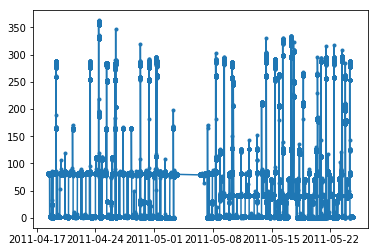

Finshed house_1 lighting channel_17


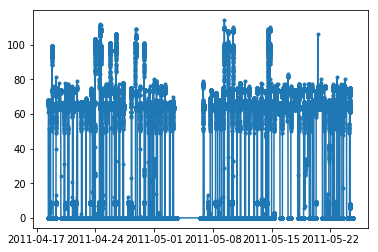

Finshed house_1 lighting channel_18


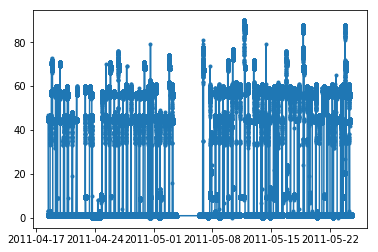

Finshed house_1 microwave channel_11


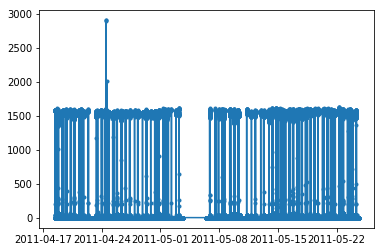

Finshed house_1 refrigerator channel_5


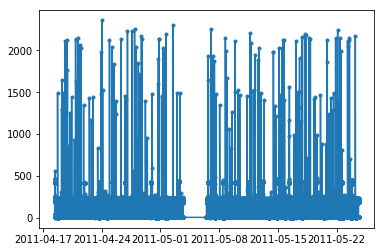

Finshed house_1 dishwaser channel_6


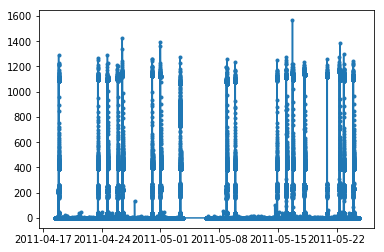

Finshed house_2 lighting channel_4


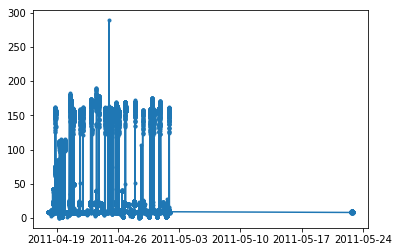

Finshed house_2 refrigerator channel_9


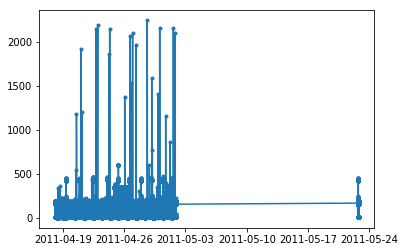

Finshed house_2 microwave channel_6


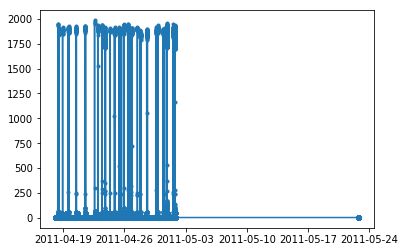

Finshed house_2 dishwaser channel_10


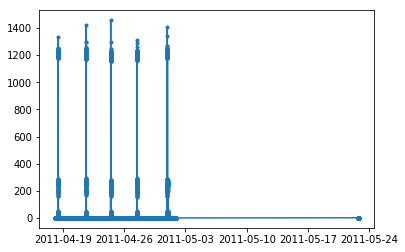

Finshed house_5 lighting channel_4


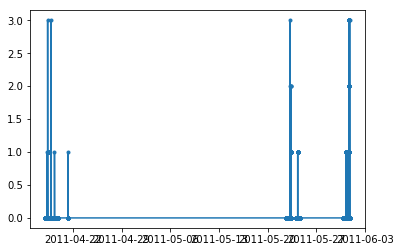

Finshed house_5 lighting channel_14


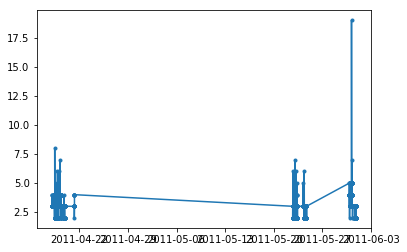

Finshed house_5 lighting channel_17


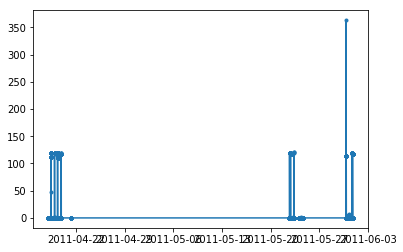

Finshed house_5 lighting channel_19


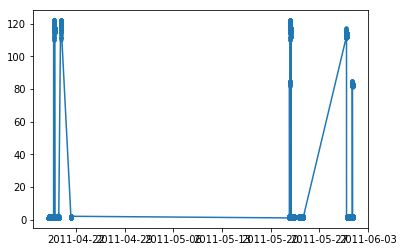

Finshed house_5 lighting channel_23


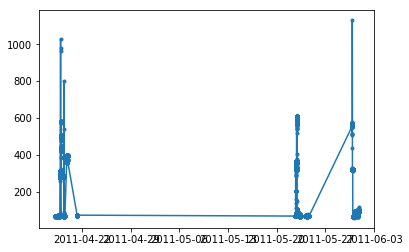

Finshed house_5 refrigerator channel_18


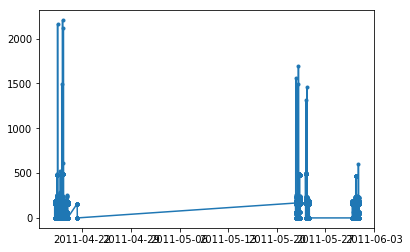

Finshed house_5 microwave channel_3


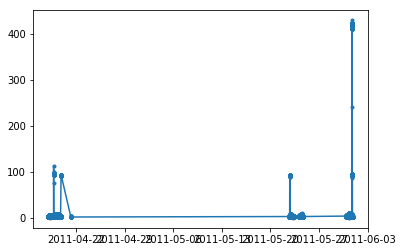

Finshed house_5 dishwaser channel_20


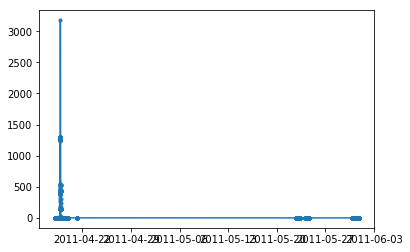

Finshed house_3 lighting channel_5


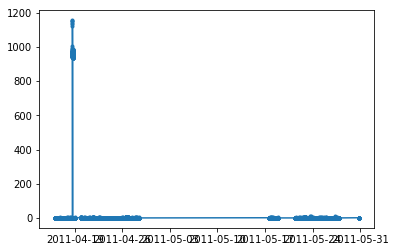

Finshed house_3 lighting channel_11


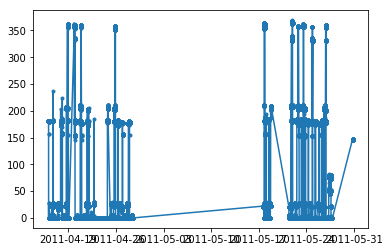

Finshed house_3 lighting channel_15


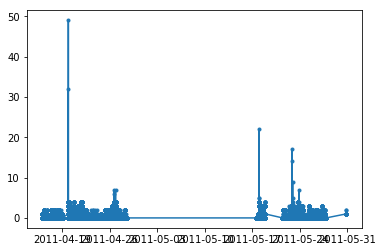

Finshed house_3 lighting channel_17


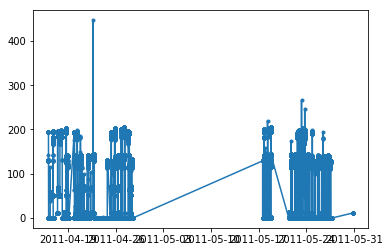

Finshed house_3 lighting channel_19


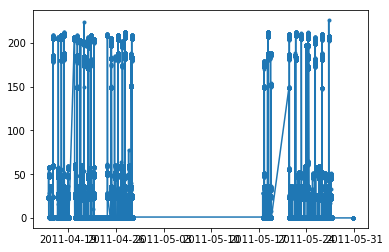

Finshed house_3 microwave channel_16


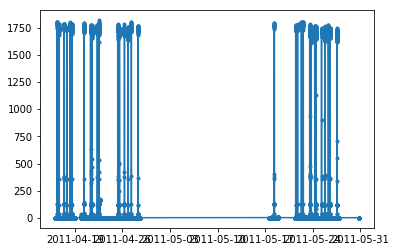

Finshed house_3 refrigerator channel_7


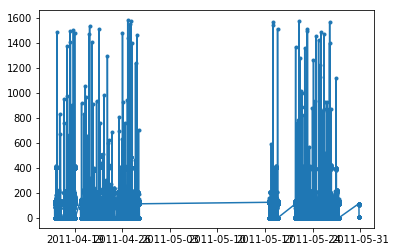

Finshed house_3 dishwaser channel_9


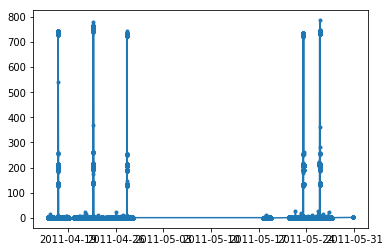

Finshed house_4 lighting channel_3


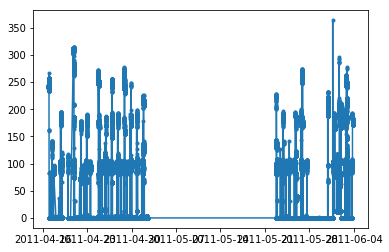

Finshed house_4 lighting channel_13


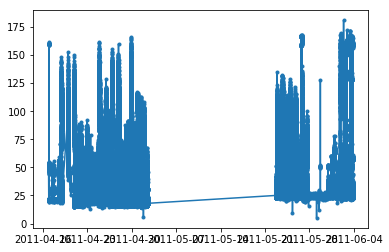

Finshed house_4 lighting channel_18


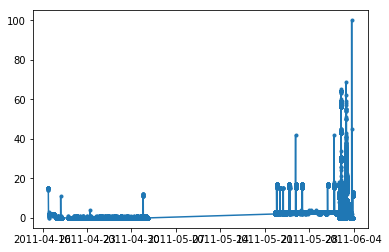

Finshed house_4 lighting channel_19


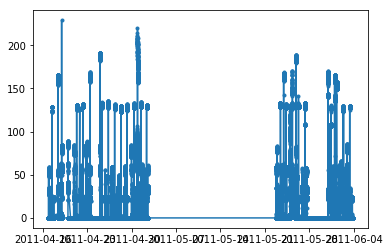

Finshed house_4 dishwaser channel_15


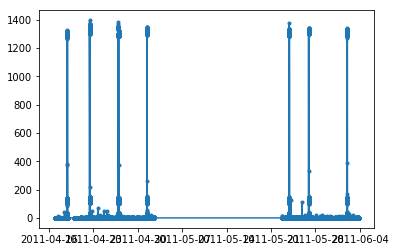

Finshed house_6 lighting channel_14


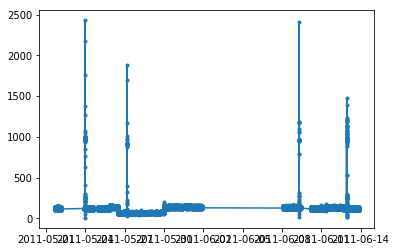

Finshed house_6 refrigerator channel_8


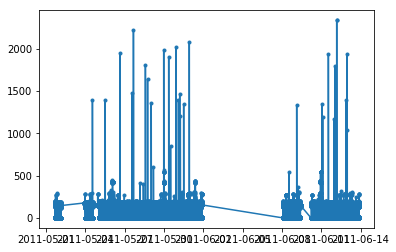

Finshed house_6 dishwaser channel_9


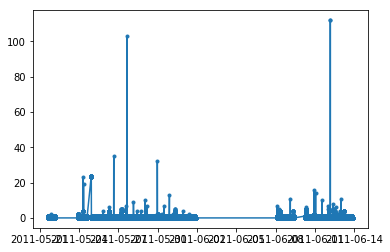

In [8]:
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

appliances = ["refrigerator","dishwaser", "lighting", "microwave"]

folder_path = "/home/anusha/anaconda3/envs/nilmtk-env/Redd/low_freq"

def convert_utc(time):
    return datetime.datetime.fromtimestamp(int(str(time)))

channels = {}
for folder in os.listdir(folder_path):
    channels[folder] = {}
    house = os.path.join(folder_path,folder,"labels.dat")
    with open(house) as f:
        for line in f:
            value = line.split()
            if value[1] in appliances:
                if value[1] not in channels[folder].keys():
                    channels[folder][value[1]] = [value[0]]
                else:
                    channels[folder][value[1]].append(value[0])

fig ,axis = plt.subplots()

for folder in os.listdir(folder_path):
    for app in channels[folder].keys():
        for chnl in channels[folder][app]:
            dates = []
            power = []
            i=1
            with open(os.path.join(folder_path,folder,"channel_"+chnl+".dat")) as f:
                for line in f:
                    a,b = line.split()
                    dates.append(convert_utc(a))
                    power.append(float(b))
                    
                    i += 1
            print("Finished "+str(folder)+" "+str(app)+" channel_"+str(chnl))
            plt.plot_date(dates, power,ls='-',marker='.')
            plt.show()

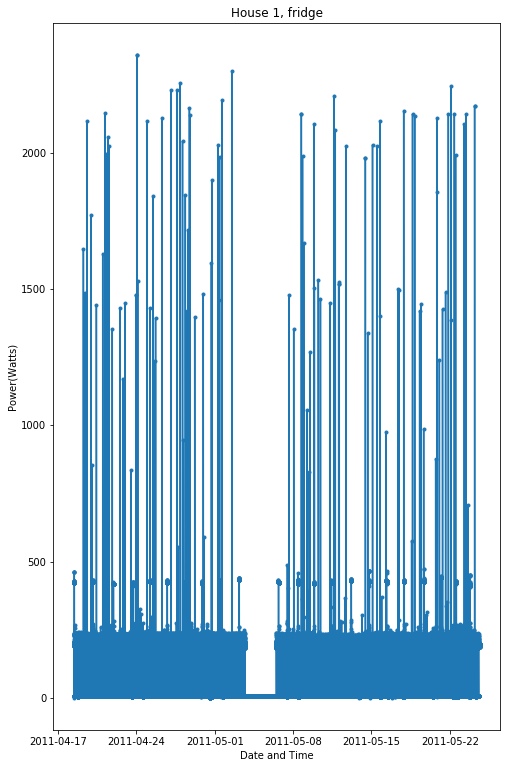

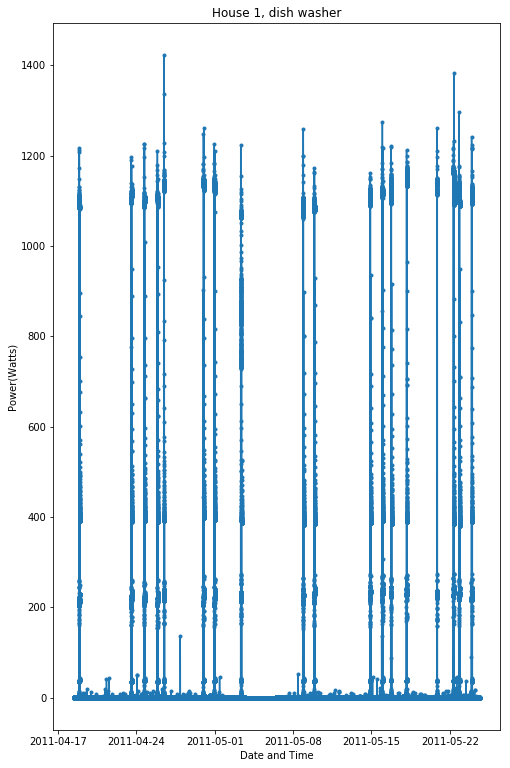

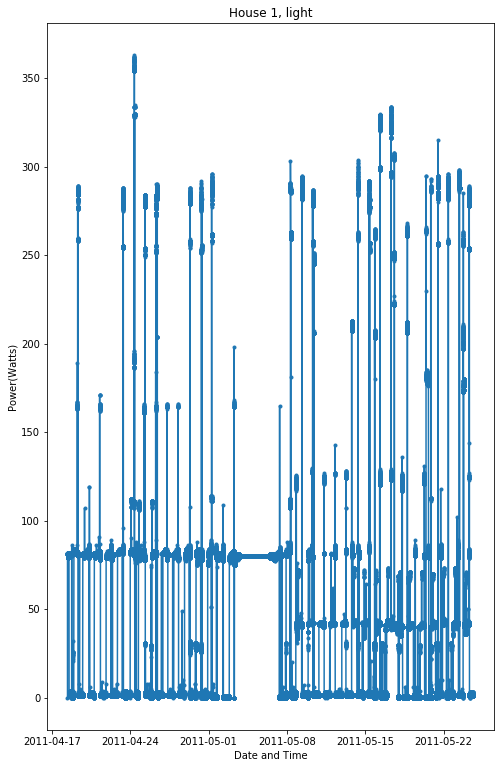

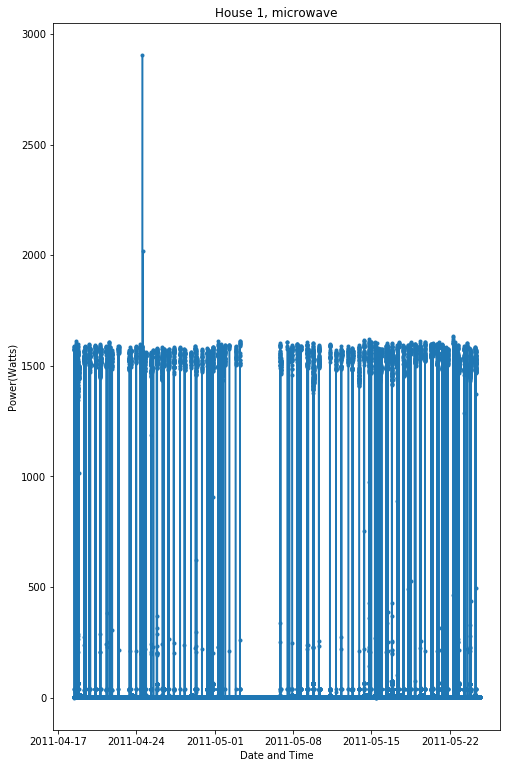

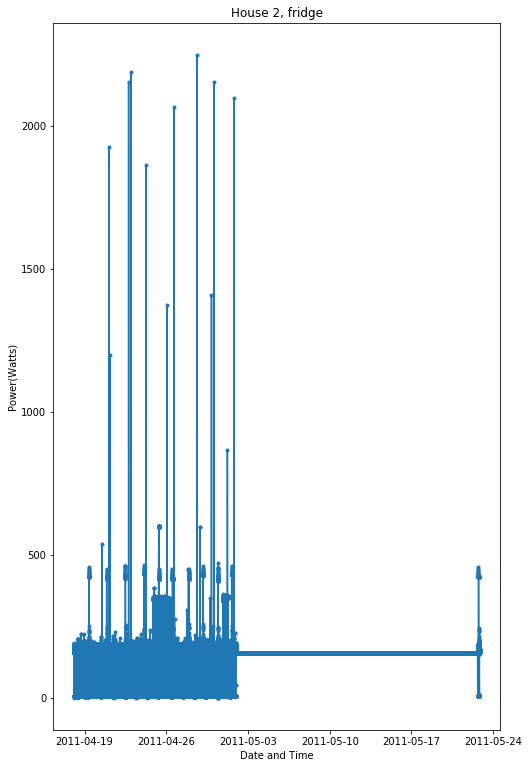

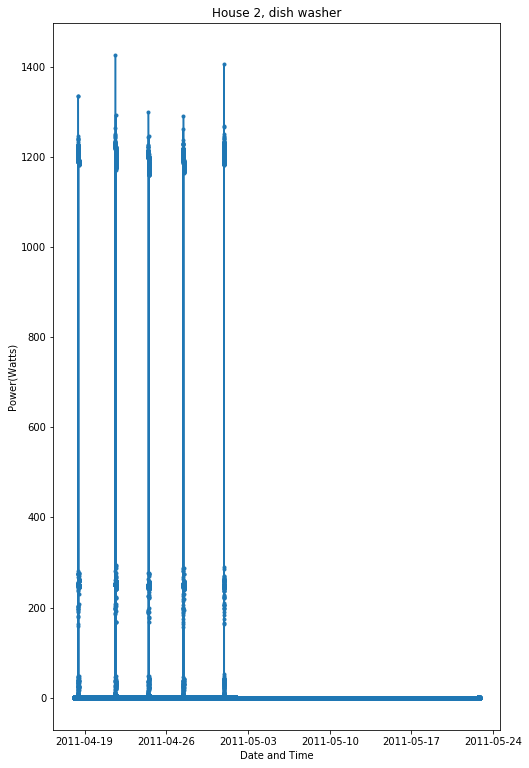

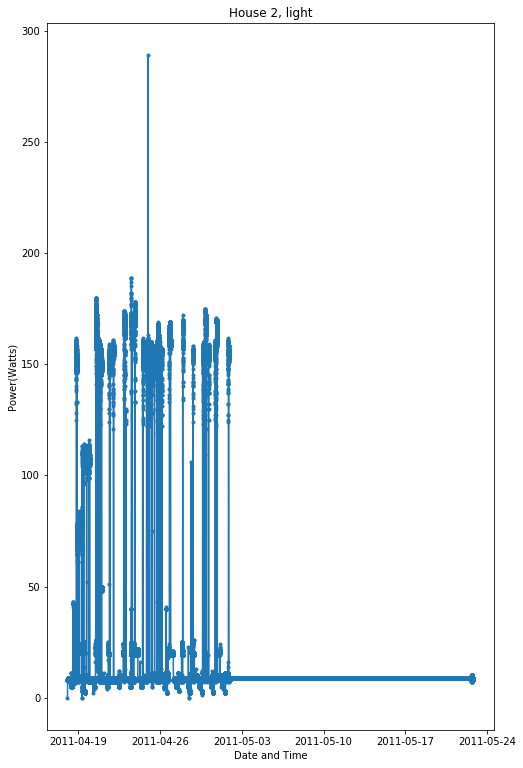

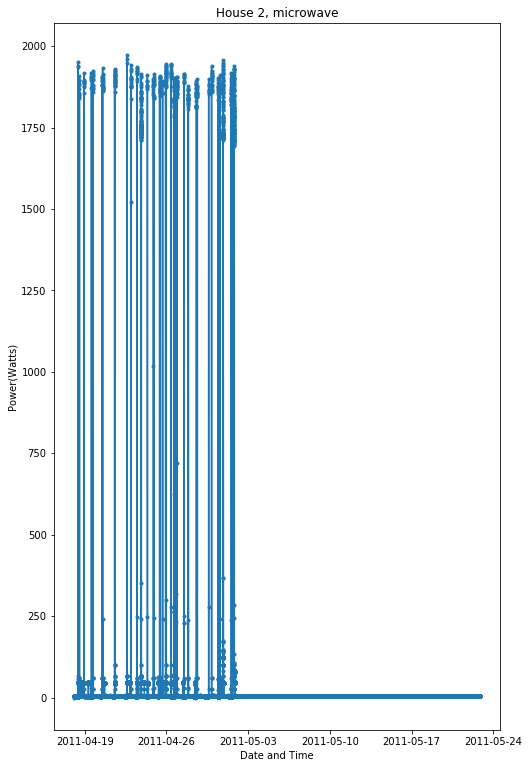

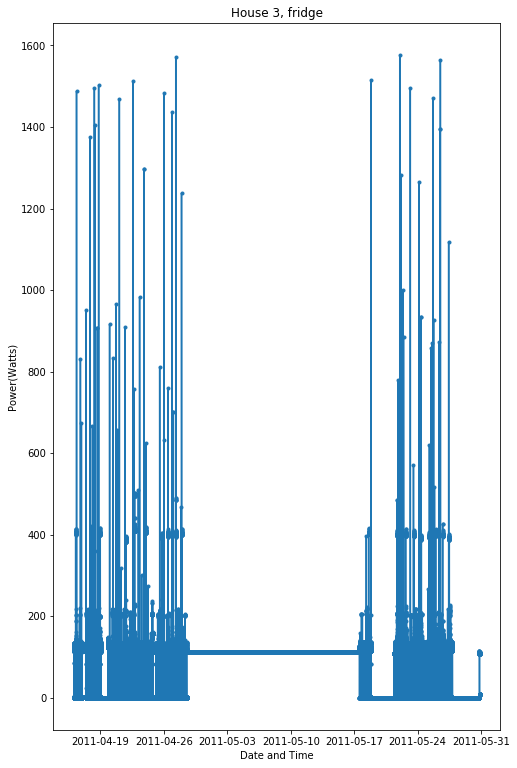

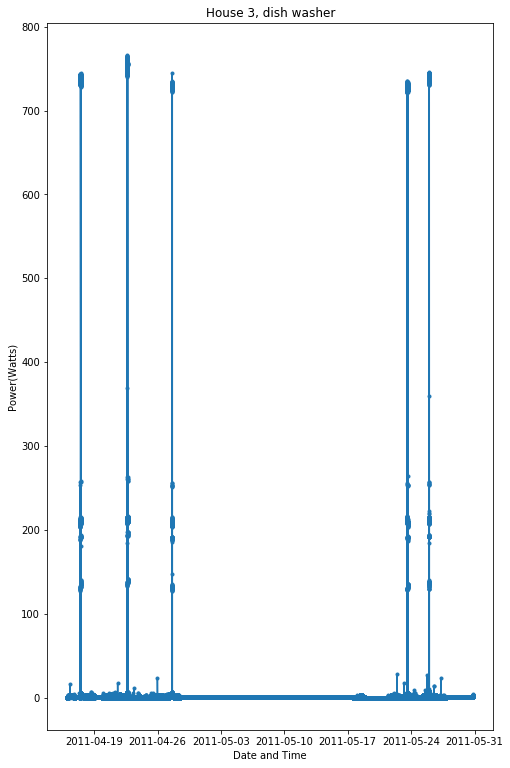

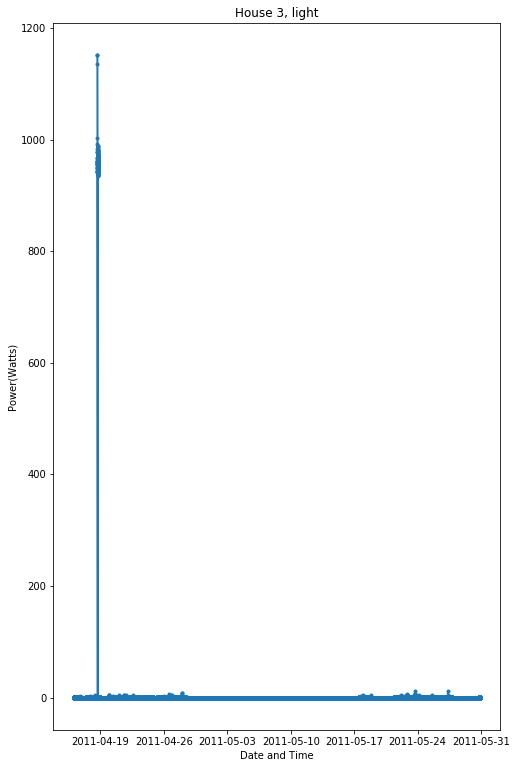

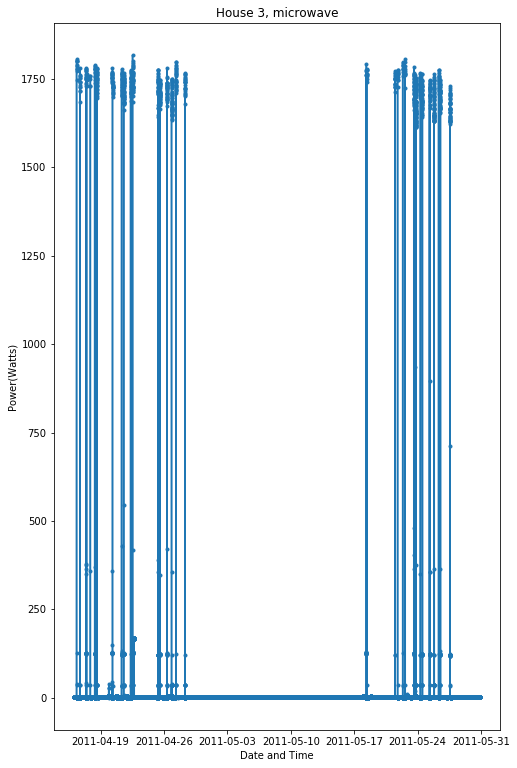

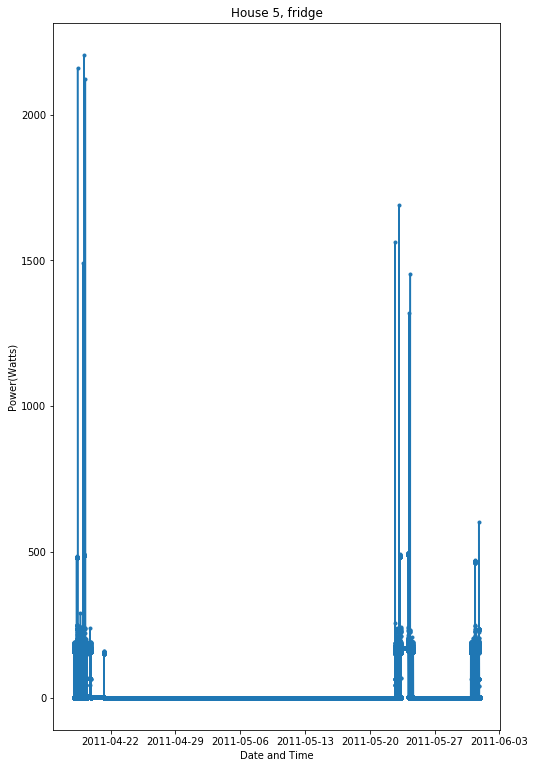

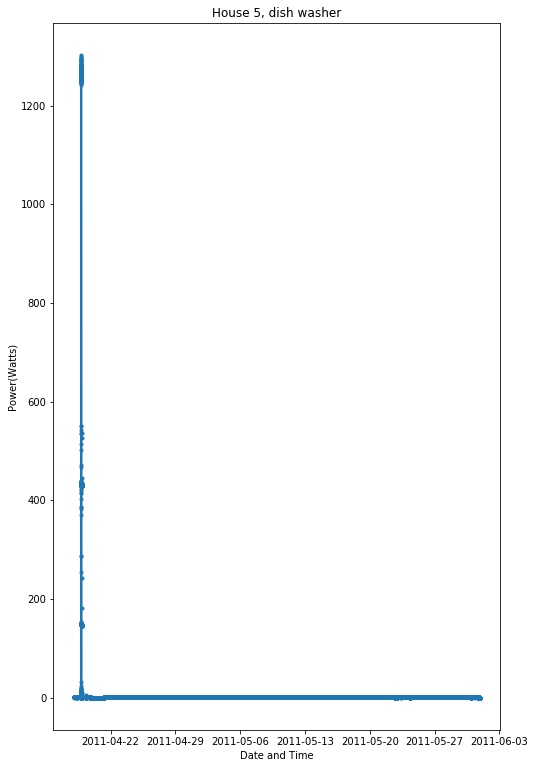

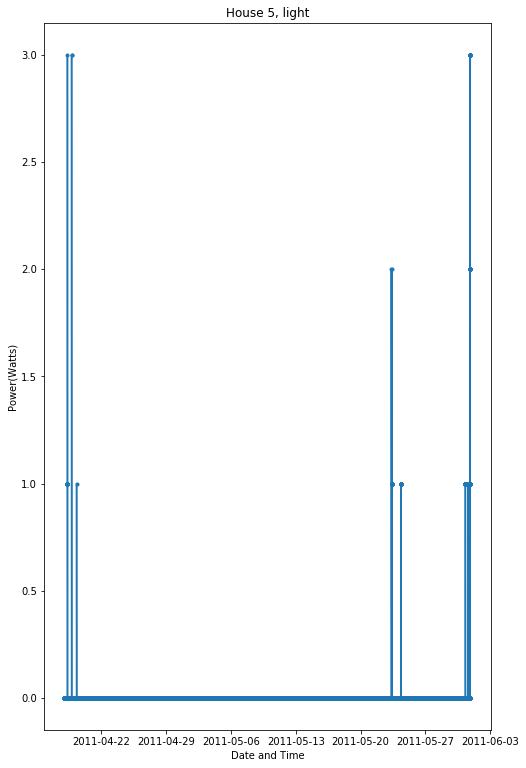

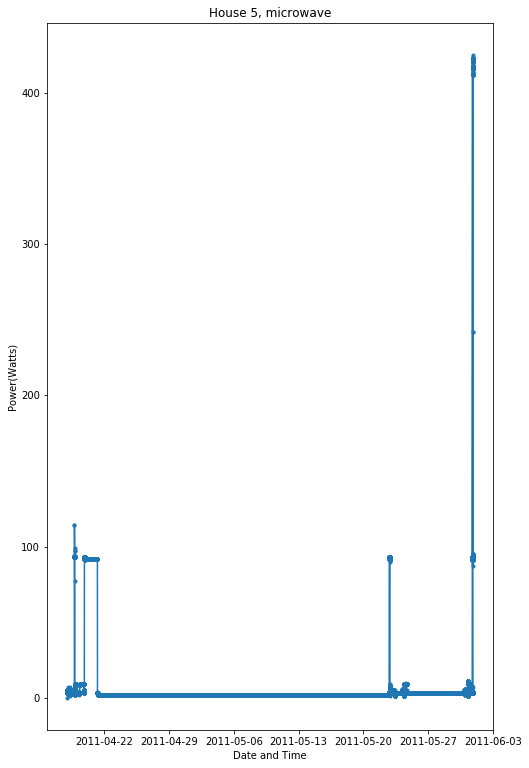

In [255]:
import nilmtk
import pandas as pd
from IPython.display import display

filename = "redd.h5"

dataset = nilmtk.DataSet(filename)

appliances = ["fridge","dish washer", "light", "microwave"]

windows = ('2010-04-15','2012-04-25')

def all_building_data(dataset,building,window):
        dfTotal = []
        df_build = pd.DataFrame(columns=['building']+appliances)#
        dataset.set_window(*window)
        elec = dataset.buildings[building].elec
        for appliance in appliances:
            pdAppSeries = pd.Series()
            # Because more than one seems not to be the total number of instances for that window
            try:
                serieApp = elec[appliance].power_series(sample_period=6, resample=True).next() #pandas.core.series.Series
                #print(len(serieApp))
            except KeyError:
                serieApp = pd.Series()
            if (len(serieApp.index) !=0): # Some buildings may not have all the appliances
                pdAppSeries = pdAppSeries.append(serieApp)
            df_build[appliance] =  pdAppSeries
        sizeBuild = len(df_build.index)
        df_build['building'] = [building for row in range(sizeBuild)]
        return df_build.fillna(0)

dataframes = []
dates=[]
start = datetime.datetime(2011,5,1)
end = datetime.datetime(2011,5,8)
j=0
for i in [1,2,3,5]:
    df = all_building_data(dataset,i,windows)
    dataframes.append(df)
    dates.append(df.index)
    #display(dates)
    #display(df)
    j  += 1
    for app in appliances:
            plt.figure(figsize=(8,13))
            plt.plot_date(dates[j-1],df[app],ls='-',marker='.')
            plt.xlabel("Date and Time")
            plt.ylabel("Power(Watts)")
            plt.title("House "+str(i)+", "+app)
            plt.show()


,building,fridge,dish washer,light
2011-05-21 15:39:18-04:00,6,0.0,0.0,0.0
2011-05-21 15:39:24-04:00,6,0.0,0.0,115.0
2011-05-21 15:39:30-04:00,6,0.0,0.0,115.0
2011-05-21 15:39:36-04:00,6,0.0,0.0,115.0
2011-05-21 15:39:42-04:00,6,0.0,0.0,115.0
2011-05-21 15:39:48-04:00,6,1.0,0.0,108.0
2011-05-21 15:39:54-04:00,6,0.0,0.0,117.0
2011-05-21 15:40:00-04:00,6,0.0,0.0,116.0
2011-05-21 15:40:06-04:00,6,0.0,0.0,116.0
2011-05-21 15:40:12-04:00,6,0.0,0.0,122.0


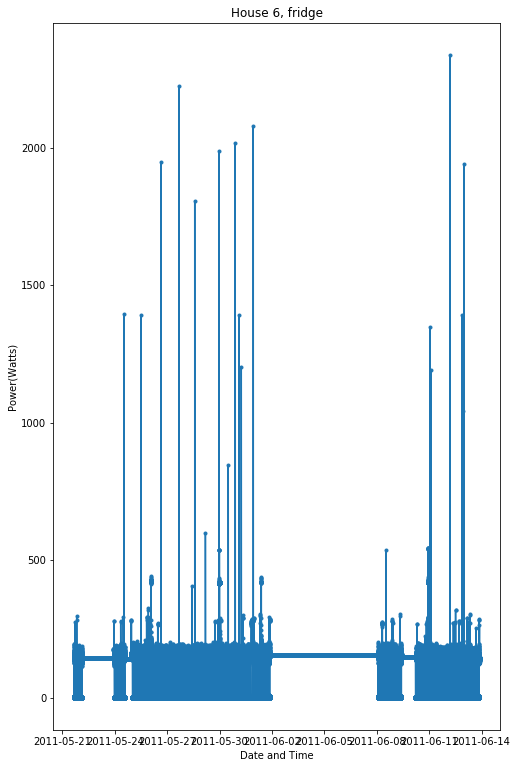

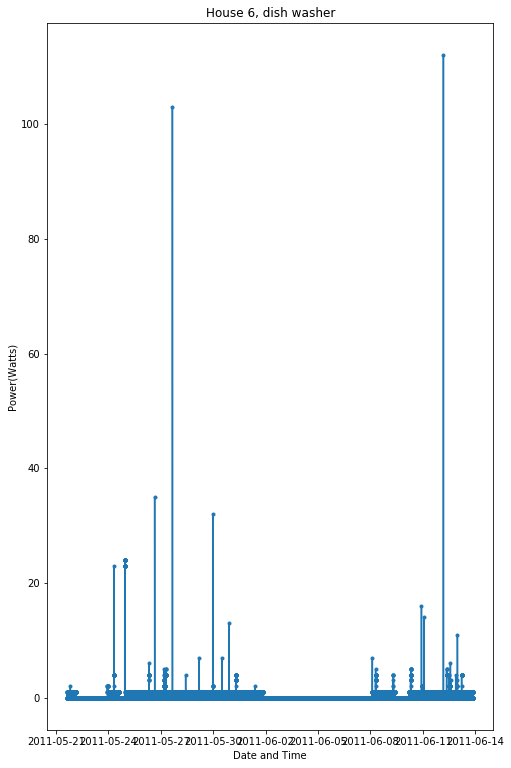

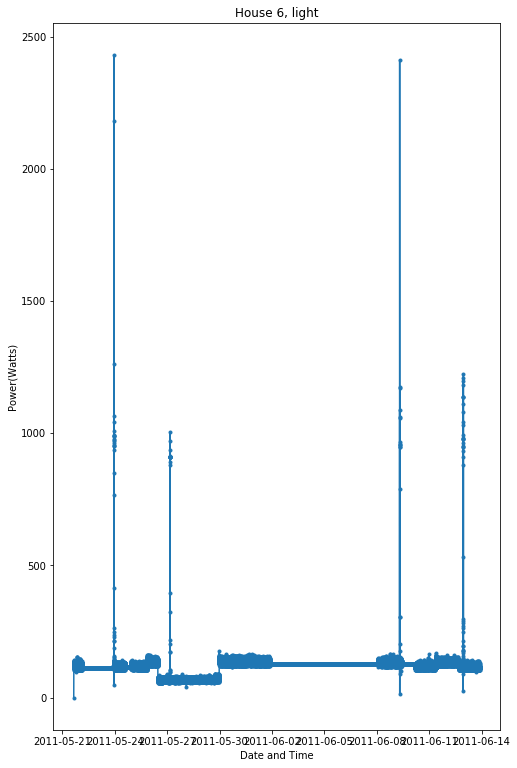

In [253]:
appliances = ["fridge","dish washer", "light"]
df = all_building_data(dataset,6,windows)
#dataframes.append(df)
dates = df.index
display(df)
for app in appliances:
    plt.figure(figsize=(8,13))
    plt.plot_date(dates,df[app],ls='-',marker='.')
    plt.xlabel("Date and Time")
    plt.ylabel("Power(Watts)")
    plt.title("House 6, "+app)
    plt.show()

House 3 fridge


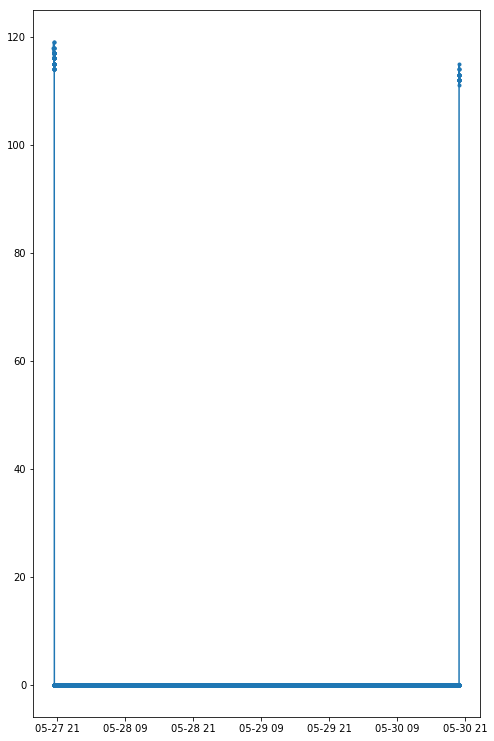

House 3 dish washer


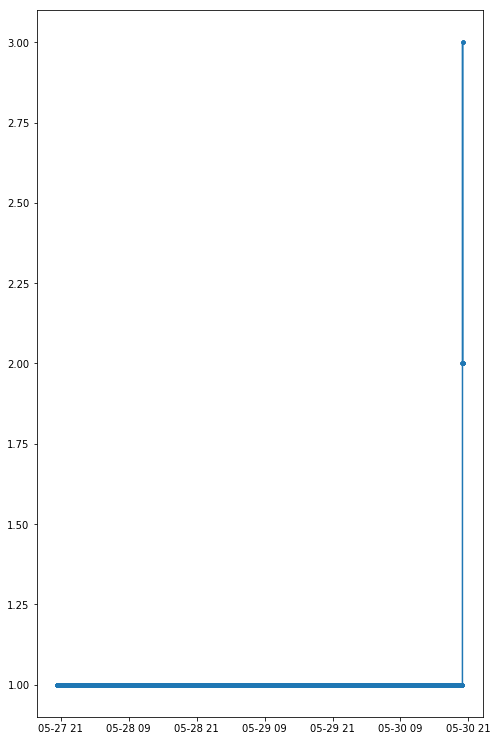

House 3 light


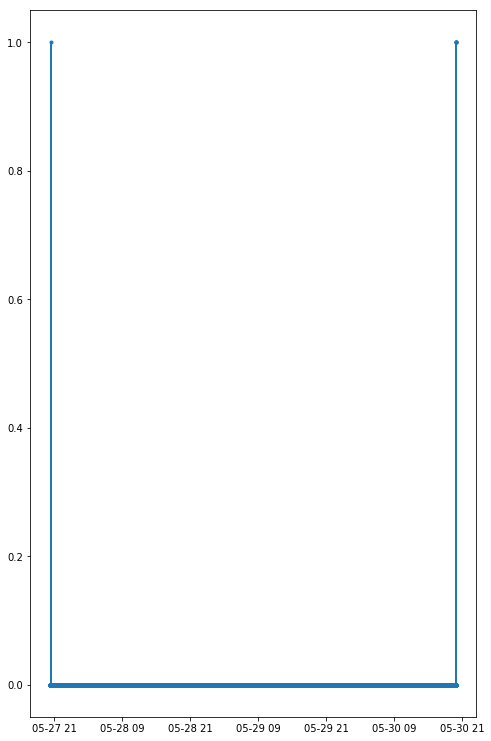

House 3 microwave


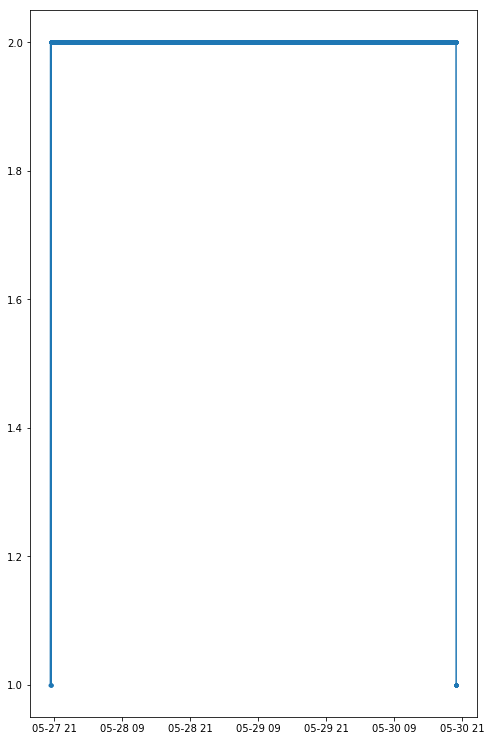

In [244]:
temp_df = dataframes[2]['2011-05-27 20:18:00':'2011-05-30 20:00:00']
dates = temp_df.index.tolist()
for app in appliances:
    print("House 3 "+app)
    plt.figure(figsize=(8,13))
    plt.plot_date(dates,temp_df[app],ls='-',marker='.')
    plt.xlabel("Date and Time")
    plt.ylabel("Power(Watts)")
    plt.title("House "+str(i)+", "+app)
    plt.show()


In [ ]:
'''for app in appliances:
        print("House "+str(i)+" "+app)
        plt.figure(figsize=(8,13))
        plt.plot_date([x for x in range(len(df[app]["2011-05-01":"2011-05-08"]))],df[app]["2011-05-01":"2011-05-08"],ls='-',marker='.')
        plt.show()'''